In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
!head data/72565003017.csv

"STATION","DATE","SOURCE","LATITUDE","LONGITUDE","ELEVATION","NAME","REPORT_TYPE","CALL_SIGN","QUALITY_CONTROL","WND","CIG","VIS","TMP","DEW","SLP","AA1","AA2","AA3","AB1","AD1","AE1","AH1","AH2","AH3","AH4","AH5","AH6","AI1","AI2","AI3","AI4","AI5","AI6","AJ1","AK1","AM1","AN1","AT1","AT2","AT3","AT4","AT5","AT6","AU1","AU2","AU3","AW1","AW2","AW3","AW4","AX1","AX2","AX3","AX4","ED1","GA1","GA2","GA3","GD1","GD2","GD3","GD4","GE1","GF1","KA1","KA2","KB1","KB2","KB3","KC1","KC2","KD1","KD2","KE1","KG1","KG2","MA1","MD1","MF1","MG1","MH1","MK1","MV1","MW1","MW2","OC1","OD1","OE1","OE2","OE3","RH1","RH2","RH3","WA1","REM","EQD"
"72565003017","2021-01-01T00:00:00","4","39.84657","-104.65623","1647.2","DENVER INTERNATIONAL AIRPORT, CO US","FM-12","99999","V020","340,1,N,0021,1","99999,9,9,N","016000,1,9,9","+0000,1","-0056,1","10162,1",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,"99,9,+02250,1,99,9",,,,,,,"9,MSL   ,+99999,+99999","06,99,1,99,9,99,9,02250,1,99,9,99,9","120,M,+0061,1","120,N,-00

In [3]:
denver = pd.read_csv(
    'data/72565003017.csv',
    parse_dates=['DATE'],
    usecols=['STATION',
             'SOURCE', 
             'DATE',
            'LATITUDE',
            'LONGITUDE',
            'ELEVATION',
            'NAME',
            'REPORT_TYPE',
            'WND',
            'CIG',
            'VIS',
            'TMP',
            'DEW',
            'SLP',
            'AA1', # PRECIPITATION PERIOD QUANTITY
            'AA2', # PRECIPITATION DEPTH
            'AA3', # PRECIPITATION CONDITION
            'AJ1', # SNOW
            'AT1', # WEATHER OBSERVATION
            'AT2',
            'AT3',
            'AT4',
            'AT5',
            'AT6',
#            'AT7',
#            'AT8',
            'AW1',
            'AW2',
            'AW3',
            'AW4',
            'REM'],
    dtype={'AT5':object, 'AT6':object})

In [4]:
denver.shape

(13426, 29)

In [5]:
denver.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13426 entries, 0 to 13425
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   STATION      13426 non-null  int64         
 1   DATE         13426 non-null  datetime64[ns]
 2   SOURCE       13426 non-null  int64         
 3   LATITUDE     13426 non-null  float64       
 4   LONGITUDE    13426 non-null  float64       
 5   ELEVATION    13426 non-null  float64       
 6   NAME         13426 non-null  object        
 7   REPORT_TYPE  13426 non-null  object        
 8   WND          13426 non-null  object        
 9   CIG          13426 non-null  object        
 10  VIS          13426 non-null  object        
 11  TMP          13426 non-null  object        
 12  DEW          13426 non-null  object        
 13  SLP          13426 non-null  object        
 14  AA1          10031 non-null  object        
 15  AA2          440 non-null    object        
 16  AA3 

# Expand and rename visibility data

In [6]:
denver = pd.concat([denver, denver.VIS.str.split(',', expand=True)], axis=1)

In [7]:
denver = denver.rename(
    columns={
        0: 'VIS_METERS', 
        1: 'VIS_Q', 
        2: 'VIS_V', 
        3: 'VIS_QV'})

In [8]:
denver.VIS_METERS = pd.to_numeric(denver.VIS_METERS)

In [9]:
denver = pd.concat(
    [denver, denver.WND.str.split(
        ',', expand=True)], axis=1
)

In [10]:
denver = denver.rename(
    columns={
        0: 'WND_ANGLE', 
        1: 'WND_QC', 
        2: 'WND_TYPE', 
        3: 'WND_SPEED',
        4: 'WND_SPEED_QC'})

In [11]:
denver.WND_ANGLE = pd.to_numeric(denver.WND_ANGLE)

In [12]:
denver.WND_SPEED = pd.to_numeric(denver.WND_SPEED)

In [13]:
denver = pd.concat([denver, denver.CIG.str.split(',', expand=True)], axis=1)

In [14]:
denver = denver.rename(
    columns={
        0: 'CIG_HEIGHT', 
        1: 'CIG_QC', 
        2: 'CIG_DC', # Determination Code 
        3: 'CIG_CAVOK'})

In [15]:
denver.CIG_HEIGHT = pd.to_numeric(denver.CIG_HEIGHT)

In [16]:
denver = pd.concat([denver, denver.TMP.str.split(',', expand=True)], axis=1)

In [21]:
denver = denver.rename(
    columns={
        0: 'TMP_DEG_C', 
        1: 'TMP_QC'})

In [22]:
denver.TMP_DEG_C = pd.to_numeric(denver.TMP_DEG_C)

In [25]:
denver = pd.concat([denver, denver.DEW.str.split(',', expand=True)], axis=1)

In [27]:
denver = denver.rename(
    columns={
        0: 'DEW_DEG_C', 
        1: 'DEW_QC'})

In [29]:
denver.DEW_DEG_C = pd.to_numeric(denver.DEW_DEG_C)

In [31]:
denver.describe()

,STATION,SOURCE,LATITUDE,LONGITUDE,ELEVATION,VIS_METERS,WND_ANGLE,WND_SPEED,CIG_HEIGHT,TMP_DEG_C,DEW_DEG_C
count,1.342600e+04,13426.000000,1.342600e+04,1.342600e+04,1.342600e+04,13426.000000,13426.000000,13426.000000,13426.000000,13426.000000,13426.000000
mean,7.256500e+10,6.302622,3.984657e+01,-1.046562e+02,1.647200e+03,42256.284597,271.493371,345.070460,26456.573886,386.282437,270.503501
std,0.000000e+00,1.221638,7.105692e-15,4.263415e-14,4.547643e-13,163065.762690,269.345231,1704.977679,31528.681951,1640.207088,1660.416822
min,7.256500e+10,4.000000,3.984657e+01,-1.046562e+02,1.647200e+03,0.000000,10.000000,0.000000,30.000000,-267.000000,-294.000000
25%,7.256500e+10,6.000000,3.984657e+01,-1.046562e+02,1.647200e+03,16000.000000,120.000000,31.000000,4572.000000,22.000000,-78.000000
50%,7.256500e+10,7.000000,3.984657e+01,-1.046562e+02,1.647200e+03,16093.000000,210.000000,41.000000,22000.000000,111.000000,-17.000000
75%,7.256500e+10,7.000000,3.984657e+01,-1.046562e+02,1.647200e+03,16093.000000,290.000000,57.000000,22000.000000,206.000000,67.000000
max,7.256500e+10,7.000000,3.984657e+01,-1.046562e+02,1.647200e+03,999999.000000,999.000000,9999.000000,99999.000000,9999.000000,9999.000000


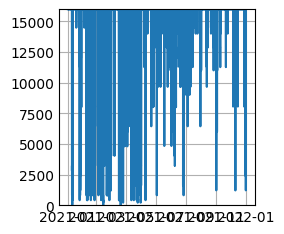

In [68]:
x = denver.DATE
y = denver.VIS_METERS

fig, ax = plt.subplots()
ax.plot(x, y)

ax.set(ylim=(0, 16000))

plt.show()